# El naufragio del Titanic como problema de Aprendizaje Automático

### Planteamiento del problema

El naufragio del Titanic es conocido por todos. En este cuaderno y a partir de un conjunto de datos reales exploraremos si la supervivencia de los pasajeros sería predecible a partir de algunas de sus características como su género o la clase en la que viajaban.

Para ello construiremos un modelo de clasificación que dividirá a la población en dos clases:

Supervivientes. Aquellas personas que lograron salvarse de la catástrofe (principalmente mediante botes salvavidas)

No supervivientes. Aquellas personas que no sobrevivieron al naufragio.

Nuestro conjunto de datos consta de la variable `survived` que valdrá 1 cuando la persona haya sobrevivido y 0 en caso contrario, por tanto se trata de un **problema de clasificación binaria**.


### Breve exploración de los datos

Comenzamos cargando el conjunto de datos con el que vamos a trabajar. Este conjunto es bastante popular y se puede o bien descargar o bien extraer directamente del módulo `seaborn`. En este curso optaremos por esta segunda opción:

In [17]:
import seaborn as sns
datos_titanic = sns.load_dataset("titanic")

In [18]:
datos_titanic.shape

(891, 15)

In [19]:
datos_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Diccionario de datos



In [20]:
datos_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Diccionario de datos

A continuación se enumeran y explican las 16 variables que componen este dataset:

* **Survived**. Es una variable binaria que nos indica si la persona ha sobrevivido (1) o no (0).
* **PClass**. Es una variable categórica que nos indica la clase en la que viajaba el pasajero. Tiene tres niveles: primera clase (1), segunda clase (2) o tercera clase (3).
* **Sex**. Indica el sexo de la persona, solo considera hombre o mujer.
* **Age**. Indica la edad en años de la persona.
* **Sibsp**. Número de hermanos/esposos que la persona tiene a bordo del barco.
* **Parch**. Número de padres o  hijos que la persona tiene a bordo del barco.
* **Fare**. El billete del pasajero.
* **Cabin**. Indica el número de cabina del pasajero.
* **Embarked**. Indica el puerto en el que embarcó el pasajero y toma tres posibles valores Cherbourg (C), Queenstown (Q) y Southampton (S).
* **Deck**. Indica la cubierta del barco en la que se encontraba el pasajero.

Las siguientes variables son construidas a partir de las anteriores y no formaban parte del dataset anterior:

* **class** Indican la clase por su nombre
* **who** Indican si era hombre, mujer o niño.
* **adult_male** Indica si se trataba o no de un hombre adulto.
* **embark_town** Equivalente a la variable Embarked pero usando los nombres
* **alive** Equivalente a survived pero con sí o no.
* **alone** Indica si el pasajero viajaba solo.



In [21]:
datos_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Comenzamos explorando las variables para detectar valores nulos:

In [6]:
datos_titanic.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Observamos que la mayor parte de las variables se encuentran completas a excepción de tres:

* La edad que presenta 177 valores vacíos.
* La cabina que preseta 687 valores vacíos.
* La variable de embarcado que presenta 2 valores vacíos.


Hacemos una breve imputación de nulos:

In [ ]:
datos_titanic['age'].fillna(datos_titanic['age'].median(), inplace=True)
datos_titanic['deck'].fillna(datos_titanic['deck'].mode()[0], inplace=True)
datos_titanic['embark_town'].fillna(datos_titanic['embark_town'].mode()[0], inplace=True)

/tmp/ipython-input-1259577514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_titanic['age'].fillna(datos_titanic['age'].median(), inplace=True)
/tmp/ipython-input-1259577514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Podemos estudiar además como se distribuye nuestra variable objetivo:

In [22]:
datos_titanic['survived'].value_counts()

,count
survived,
0,549
1,342


In [25]:
datos_titanic['sex'].value_counts()

,count
sex,
male,577
female,314


En ocasiones para entender bien un dataset conviene visualizar algunas de sus variables:

<Axes: xlabel='sex', ylabel='count'>

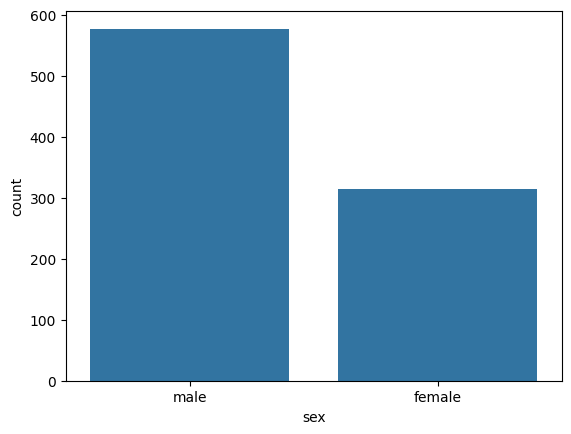

In [23]:
sns.countplot(x='sex',data=datos_titanic)

<Axes: xlabel='pclass', ylabel='count'>

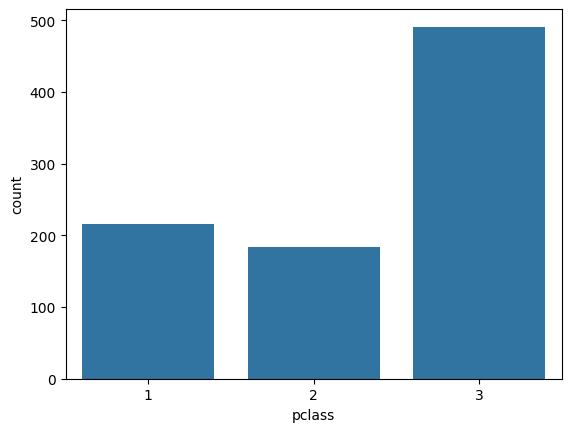

In [26]:
sns.countplot(x='pclass',data=datos_titanic)

<Axes: xlabel='who', ylabel='count'>

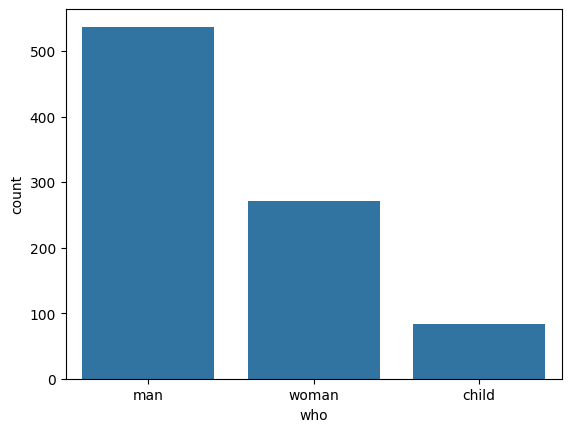

In [27]:
sns.countplot(x='who',data= datos_titanic)

Para poder usar algoritmos debemos transformar las variables que utilizan strings en variables numéricas. Para ello usamos variables dummies:

In [28]:
datos_titanic = datos_titanic.drop(["pclass", "embarked", "alive"], axis=1)

In [29]:
import pandas as pd
datos_titanic_limpios= pd.get_dummies(datos_titanic, columns=['sex', 'embark_town', 'class', 'who', 'deck'], drop_first= True)  #automatiza la generación de dummies

In [30]:
datos_titanic_limpios.head()

,survived,age,sibsp,parch,fare,adult_male,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,22.0,1,0,7.2500,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False
1,1,38.0,1,0,71.2833,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False
3,1,35.0,1,0,53.1000,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False
4,0,35.0,0,0,8.0500,True,True,True,False,True,False,True,True,False,False,False,False,False,False,False


Dividimos el conjunto en datos de entrenamiento y datos de validación separando las variables predictoras de la variable objetivo, es decir, aquella que vamos a buscar predecir:

In [31]:
X = datos_titanic_limpios.drop('survived', axis=1)
y = datos_titanic_limpios['survived']

Separamos nuestro conjunto de datos en uno de entrenamiento (casos que enseñaremos al modelo para que aprenda) y otro de validación (casos con los que evaluaremos si el modelo ha sido capaz de aprender o no):

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Una vez hemos separado los conjuntos de datos estamos listos para construir nuestro modelo.

### Construcción del modelo

A continuación vamos a construir un árbol de decisión uno de los modelos típicos de Aprendizaje Automático, para ello usaremos el módulo `scikit-learn`:

In [33]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 5, random_state = 1)

Con estas dos líneas de código ya hemos construido nuestra estructura de árbol. A continuación vamos a alimentarla con ejemplos para que pueda empezar a aprender. A este proceso lo llamamos **entrenamiento del modelo**:

In [34]:
arbol = arbol.fit(X_train, y_train)

Usamos el modelo entrenado para realizar predicciones en test y ver si estamos obteniendo buenos resultados:

In [35]:
predicciones_test = arbol.predict(X_test)

Podemos calcular de manera rápida la tasa de acierto en los conjuntos de entrenamiento y validación:

In [36]:
arbol.score(X_train, y_train)

0.8339575530586767

In [37]:
arbol.score(X_test, y_test)

0.8333333333333334

Nuestro modelo no tiene nada de sobreentrenamiento y posee una tasa de acierto de un 83%, nada desdeñable para ser un primer intento.

Podemos explorar además cómo han sido los errores del modelo:

In [38]:
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test, predicciones_test)
print(matriz_confusion)

[[46  8]
 [ 7 29]]


### Visualización de los resultados

La principal ventaja de los árboles de decisión es que son modelos 100% explicables, y además de una forma muy sencilla y visual:

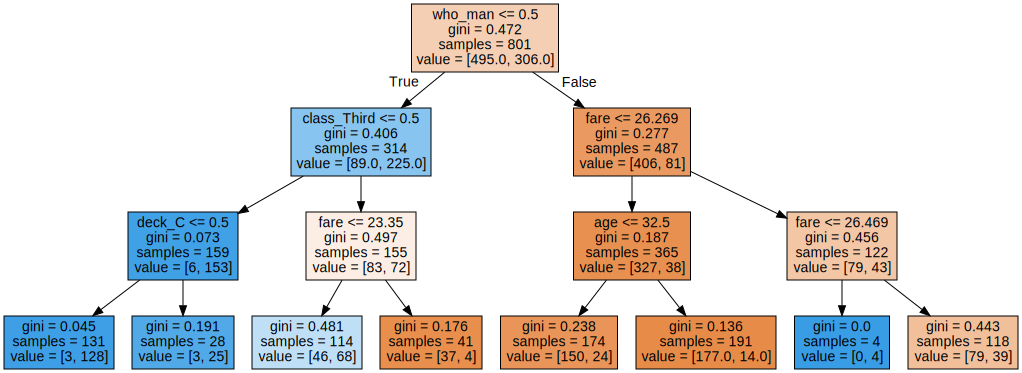

In [39]:
import graphviz
# Generación del árbol
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=X_train.columns,
                                filled=True)

# Visualizamos dicho árbol
graph = graphviz.Source(dot_data, format="png")
graph

Aunque esta visualización puede resultar un poco compleja de primeras en el fondo es sencilla.

En la primera línea de cada cuadro tenemos una afirmación,  por ejemplo, en la cúspide `who_man <= 0,5`. La variable `who_man` solo toma dos valores 0 cuando no es hombre (y la afirmación anterior sería cierta) o 1 cuando sí es hombre y la afirmación sería falsa.

En la segunda línea gini es una medida matemática de impureza.

En la tercera cuántas personas se encuentran en esa etapa. En este caso que estamos con la primera pregunta toda nuestra población ergo 801 personas.

En la cuarta línea tenemos que de esas 801, 495 no sobrevivirán y 306 sí.

Si bajamos un segundo nivel nos encontramos con `class_Third <= 0,5` que será cierta cuando la persona no vaya en tercera clase y falsa en caso de que sí vaya en tercera.

En este nodo vemos que la impureza se ha reducido, en el tenemos ya solo a 314 personas de las cuales la mayoría 225 personas se salvan y solo 89 fallecen. Por otro lado vemos que si realmente se hubiera tratado de un hombre tendríamos 406 personas fallecen vs 81 se salvan ergo la primera pregunta es muy buena pues ya es capaz de generar una separación significativamente útil.

A medida que vamos descenciendo por el árbol los nodos son cada vez más específicos y concentran más a un tipo determinado de población.



¡Muchas gracias por tu atención durante esta lección! No dudes en explorar y mainpular este cuaderno, puedes probar a crear nuevas variables o descartar algunas de las utilizadas para obtener resultados distintos. También puedes interactuar con los parámetros para intentar obtener una tasa de acierto algo mejor.